In [1]:
import numpy as np
import matplotlib.pyplot as plt

* mlp from scratch in python
* [following this guide/walk through of building an mlp from scratch](https://github.com/KirillShmilovich/MLP-Neural-Network-From-Scratch)
* MNIST images are 28x28 pixels

In [2]:
def load_data(dir_name):
    data = list()
    
    with open(dir_name, "r") as f:
        for line in f:
            split_line = np.array(line.split(",")) # split data in row
            split_line = split_line.astype(np.float32) # str to float
            data.append(split_line)
    
    data = np.asarray(data) # data list to numpy array
    
    return data[:,1:], data[:,0] # first num in each sample is the label so return X and Y components

In [8]:
X_train, Y_train = load_data("data/mnist_train.csv")
X_test, Y_test = load_data("data/mnist_test.csv")

In [9]:
print(f"Shape of training set: {X_train.shape[0]} x {X_train.shape[1]}")
print(f"Shape of testing set: {X_test.shape[0]} x {X_test.shape[1]}")

Shape of training set: 60000 x 784
Shape of testing set: 10000 x 784


In [12]:
# rescale data from 0-255 to 0.0-1.0
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

# one-hot encode train/test labels (convert 0-9 to binary vector representation)
y_train = np.zeros((Y_train.size, int(Y_train.max()) + 1))
y_train[np.arange(Y_train.size), Y_train.astype(int)] = 1.0

y_test = np.zeros((Y_test.size, int(Y_test.max()) + 1))
y_test[np.arange(Y_test.size), Y_test.astype(int)] = 1.0

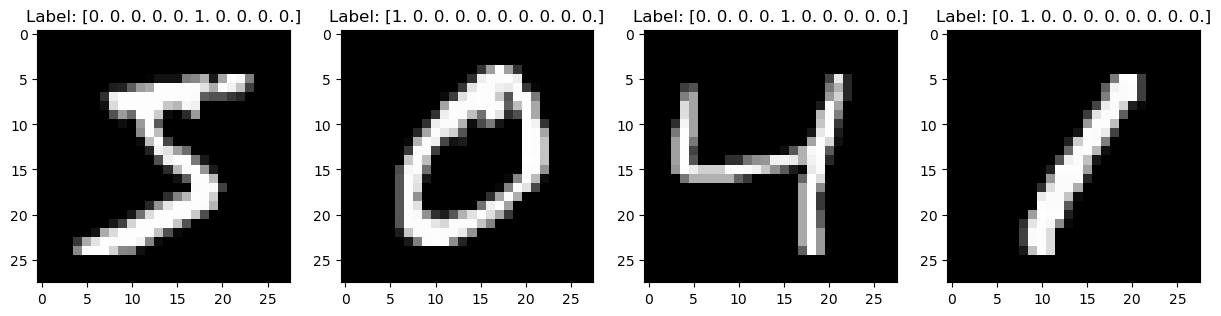

In [13]:
n = 4
fig, axes = plt.subplots(1, n, figsize=(15,10))
for image, label, ax in zip(X_train[:n], y_train[:n], axes):
    ax.imshow(image.reshape(28,28), cmap="gray", vmin=0, vmax=1.0)
    ax.set_title(f"Label: {label}")